<a href="https://colab.research.google.com/github/dakshgupta555/Aventus_Wanderers/blob/main/Drowsiness%20detection%20ML%20modelipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dlib opencv-python imutils scipy


In [2]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
from scipy.spatial import distance
from matplotlib import pyplot as plt
from google.colab import files


In [3]:
uploaded = files.upload()



Saving shape_predictor_68_face_landmarks.dat to shape_predictor_68_face_landmarks.dat


In [16]:
uploaded = files.upload()


Saving Photo on 25-06-25 at 9.44 PM.jpeg to Photo on 25-06-25 at 9.44 PM (1).jpeg


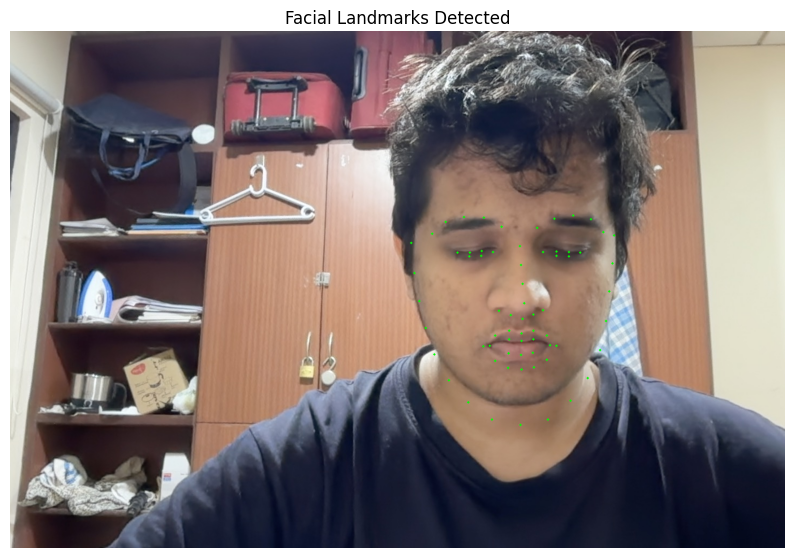

In [21]:

image_path = "Photo on 25-06-25 at 9.44 PM.jpeg"


image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


faces = detector(gray)
for face in faces:
    shape = predictor(gray, face)
    shape_np = face_utils.shape_to_np(shape)

    for (x, y) in shape_np:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)


rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.axis('off')
plt.title("Facial Landmarks Detected")
plt.show()


In [13]:
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)


EAR: 0.12 → Sleeping


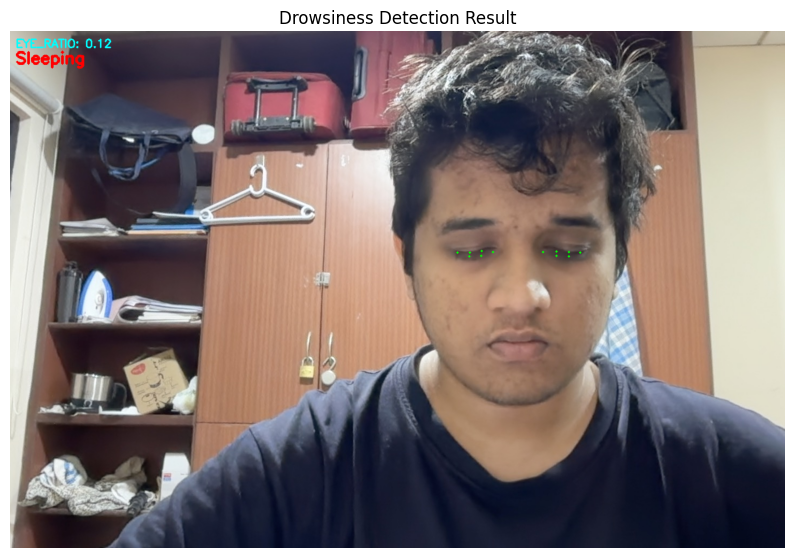

In [20]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

faces = detector(gray)
if len(faces) == 0:
    print("No face detected")
else:
    for face in faces:
        shape = predictor(gray, face)
        shape = face_utils.shape_to_np(shape)

        leftEye = shape[36:42]
        rightEye = shape[42:48]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0

        for (x, y) in np.concatenate((leftEye, rightEye)):
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        status = "Sleeping" if ear < 0.25 else "Awake"
        print(f"EAR: {ear:.2f} → {status}")

        cv2.putText(image, f"EYE_RATIO: {ear:.2f}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (350, 350, 0), 2)
        cv2.putText(image, status, (10, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                    (0, 0, 255) if status == "Sleeping" else (0, 255, 0), 3)

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Drowsiness Detection Result")
    plt.show()
